___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 8: Unsupervised learning

## Lab work 8



#### Мета: 

* навчитися використовувати моделі без учителем

### Завдання 1:

Опрацюйте файл `Groceries.csv`. Використовуючи алгоритм асоціативних зв'язків, знайдіть:
- зробіть описову статистику даного файлу
- ведіть топ-3 продукти, що продаються
- виведіть топ-2 пари продуктів, що продаються
- придумайте, як отриману інформацію можна використатти (опишіть в 3-4 реченнях)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
pip install apyori

In [3]:
!pip install apriori_python

In [4]:
df = pd.read_csv('groceries.csv')
df.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Описова статистика

In [5]:
df.describe()

,Item(s)
count,9835.000000
mean,4.409456
std,3.589385
min,1.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,32.000000


In [6]:
 df.describe(include=[object]) 

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
count,9835,7676,6033,4734,3729,2874,2229,1684,1246,896,...,14,8,7,7,6,5,4,1,1,1
unique,158,151,155,153,150,137,138,140,128,120,...,13,7,6,7,5,4,3,1,1,1
top,sausage,whole milk,whole milk,whole milk,rolls/buns,soda,soda,shopping bags,soda,shopping bags,...,waffles,bottled beer,chocolate,waffles,hygiene articles,napkins,house keeping products,skin care,hygiene articles,candles
freq,825,654,506,315,176,150,120,76,61,49,...,2,2,2,1,2,2,2,1,1,1


### Підготовка даних до проведення аналізу(переведеням у список)

In [7]:
transactions = []
for i in range(0, 9835):
    transactions.append([str(df.values[i,j]) for j in range(0, 32)])

### Проведення аналізу методом асоціативних звязків

In [8]:
from apyori import apriori
rules = apriori(transactions, min_support=0.02, min_confidence=0.2, min_lift=2, min_length=2)

In [9]:
results = list(rules)

In [10]:
len(results)

13

 ### Виведення результатів

In [13]:
for i in range(0,13):
    print(f"Required Association No. {i+1} is: {results[i]}")
    print('-'*25)

Required Association No. 1 is: RelationRecord(items=frozenset({'root vegetables', 'other vegetables'}), support=0.047381799694966954, ordered_statistics=[OrderedStatistic(items_base=frozenset({'other vegetables'}), items_add=frozenset({'root vegetables'}), confidence=0.24487651077246453, lift=2.2466049285887957), OrderedStatistic(items_base=frozenset({'root vegetables'}), items_add=frozenset({'other vegetables'}), confidence=0.43470149253731344, lift=2.2466049285887952)])
-------------------------
Required Association No. 2 is: RelationRecord(items=frozenset({'whipped/sour cream', 'other vegetables'}), support=0.02887646161667514, ordered_statistics=[OrderedStatistic(items_base=frozenset({'whipped/sour cream'}), items_add=frozenset({'other vegetables'}), confidence=0.40283687943262414, lift=2.081923651718265)])
-------------------------
Required Association No. 3 is: RelationRecord(items=frozenset({'tropical fruit', 'pip fruit'}), support=0.02043721403152008, ordered_statistics=[Ordere

In [151]:
rules1 = apriori(transactions, min_support=0.04, min_confidence=0.2, lift=1, min_length=1)

In [152]:
results1 = list(rules1)

In [153]:
len(results1)

61

In [154]:
for i in range(0,3):
    print(f"Required Association No. {i+1} is: {results[i]}")
    print('-'*25)

Required Association No. 1 is: RelationRecord(items=frozenset({'root vegetables', 'other vegetables'}), support=0.047381799694966954, ordered_statistics=[OrderedStatistic(items_base=frozenset({'other vegetables'}), items_add=frozenset({'root vegetables'}), confidence=0.24487651077246453, lift=2.2466049285887957), OrderedStatistic(items_base=frozenset({'root vegetables'}), items_add=frozenset({'other vegetables'}), confidence=0.43470149253731344, lift=2.2466049285887952)])
-------------------------
Required Association No. 2 is: RelationRecord(items=frozenset({'whipped/sour cream', 'other vegetables'}), support=0.02887646161667514, ordered_statistics=[OrderedStatistic(items_base=frozenset({'whipped/sour cream'}), items_add=frozenset({'other vegetables'}), confidence=0.40283687943262414, lift=2.081923651718265)])
-------------------------
Required Association No. 3 is: RelationRecord(items=frozenset({'tropical fruit', 'pip fruit'}), support=0.02043721403152008, ordered_statistics=[Ordere

У результаті проведеного аналізу алгоритмом асоціативних звязків топ три продукти, котрі купували: овочі(інші овочі), сметана, та однонасінневі фрукти. Дві пари продуктів котрі найкраще продавалися це овочі з коренопродами та сметана з іншими овочами. Оскільки у даному магазині овочі продають переважно з кисломолочними продуктами, то варно промоакції організовувати у аспекті спільної покупки таких товарів, котра нагоробжується бонусами також у рекламних проспектах можна пропонувати рецепти страв, котрі ппоєднують ці складові.

### Завдання 2:

Завантажте файл https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
 
- Спробуйте провести кластеризацію, тобто виділити цільові групи, для яких можна впроваджувати певні маркетингові акції
- Опишіть отримані результати

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('Mall_Customers.csv',  delimiter=',', quotechar='"')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
 df.describe(include=[object]) 

,Gender
count,200
unique,2
top,Female
freq,112


In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df['Age'] = df['Age'].astype(float)

In [9]:
df['Annual Income (k$)'] = df['Annual Income (k$)'].astype(float)

In [10]:
df['Spending Score (1-100)'] = df['Spending Score (1-100)'].astype(float)

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39.0
1,2,Male,21.0,15.0,81.0
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,16.0,77.0
4,5,Female,31.0,17.0,40.0


In [12]:
df.dtypes

CustomerID                  int64
Gender                     object
Age                       float64
Annual Income (k$)        float64
Spending Score (1-100)    float64
dtype: object

### Нормалізація датасету

In [13]:
from scipy.cluster.vq import whiten

In [14]:
df['Age'] = whiten(df['Age'])

In [15]:
df['Annual_Income_k_USD'] = whiten(df['Annual Income (k$)'])

In [16]:
df['Spending_Score_1-100'] = whiten(df['Spending Score (1-100)'])

In [17]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Annual_Income_k_USD',
       'Spending_Score_1-100'],
      dtype='object')

In [18]:
df.dtypes

CustomerID                  int64
Gender                     object
Age                       float64
Annual Income (k$)        float64
Spending Score (1-100)    float64
Annual_Income_k_USD       float64
Spending_Score_1-100      float64
dtype: object

In [19]:
features = ['Age', 'Annual_Income_k_USD', 'Spending_Score_1-100']
X = df[features]

### Стандартизація то проведення крастеризації 

In [20]:
min_max_scaler = preprocessing.MinMaxScaler()

In [21]:
scaled_features = min_max_scaler.fit_transform(X)
df = pd.DataFrame(X)

In [22]:
true_labels = df.columns

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans( n_clusters=5, n_init=10, max_iter=300, random_state=42)

In [24]:
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [25]:
kmeans.inertia_

168.24758017556837

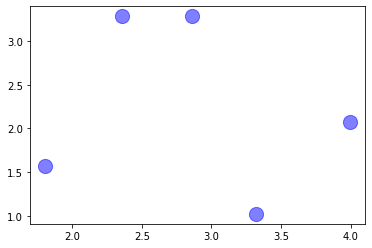

In [26]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5);

In [27]:
kmeans.n_iter_

6

In [28]:
from sklearn.metrics import adjusted_rand_score

In [29]:
scaled_features = X

In [30]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=5)

In [31]:
kmeans.fit(scaled_features)

KMeans(n_clusters=5)

In [32]:
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)

In [33]:
kmeans_silhouette

0.42

In [35]:
 df['cluster'] = kmeans.labels_

In [36]:
df.describe()

,Age,Annual_Income_k_USD,Spending_Score_1-100,cluster
count,200.000000,200.000000,200.000000,200.000000
mean,2.788136,2.311541,1.948842,1.740000
std,1.002509,1.002509,1.002509,1.261091
min,1.291800,0.572541,0.038822,0.000000
25%,2.063292,1.584031,1.349049,1.000000
50%,2.583601,2.347420,1.941078,2.000000
75%,3.516568,2.977215,2.833974,3.000000
max,5.023668,5.229212,3.843335,4.000000


In [149]:
df.groupby(['cluster'])['Annual_Income_k_USD'].sum()

cluster
0    131.455514
1     20.420645
2     84.697963
3    128.172943
4     97.561061
Name: Annual_Income_k_USD, dtype: float64

In [37]:
df.groupby(['cluster'])['Annual_Income_k_USD'].count()

cluster
0    39
1    54
2    47
3    40
4    20
Name: Annual_Income_k_USD, dtype: int64

In [150]:
df.groupby(['cluster'])['Spending_Score_1-100'].sum()

cluster
0    126.597109
1     14.247513
2    130.479266
3     29.310278
4     89.134303
Name: Spending_Score_1-100, dtype: float64

У результаті проведення кластерного аналізу методом К-середніх зафіксовано пять кластерів(попередньо проведений аналіз із розбиттям на три кластери показав нижчий показник Silhouette). Серед виділених кластерів, перший, що виділився складають особи, котрі приносять високий прибуток та мають та мають гарні показники споживання, другий кластер - протилежний до першого, особи з низькими показниками прибутковості та споживання, третій, ті що приносять середній прибуток проте мають високі показники споживання, четвертий: приносять гарний прибуток, проте мають низькі показники споживання та пятий це особи з середніми показниками прибутковості та споживання. Щодо маркетингових акцій, на мою думку, потрібно трошки попрацювати з пятим кластером, щоб підняти показники до високих, та приділити увагу роботі з другим кластером, щоб покращими показники.   